
## Classification practical



In [ ]:
from keras.datasets import mnist #importing data from mist database
import numpy as np #importing numpy as np
np.random.seed(1337) 
import pandas #importing pandas

import tensorflow as tf #importing tensorflow library
from tensorflow.keras import Sequential #importing sequential from keras in tensorflow
from tensorflow.keras.layers import Dense #importing dense from keras in tensorflow
from tensorflow.keras import metrics  #importing metrics from keras in tensorflow
from sklearn.preprocessing import StandardScaler #importing standardscaler from preprocessing in sklearn
from sklearn.model_selection import train_test_split#importing train_text_split from model selection in sklearn
#importing confusion matrix, accuracy score from metrics in sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import np_utils #importing np_utils from utils in keras 
import matplotlib.pyplot as plt #importing matplotlib for the plots

## Load the dataset

In [ ]:
#loading data and splitting data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

## View the shape

In [ ]:
#printing the shapes of the data
print('Training data shape : ', X_train.shape, Y_train.shape)
print('Testing data shape : ', X_test.shape, Y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


## Find the unique numbers from the train labels

In [ ]:
classes = np.unique(Y_train) #classes in the training data
nClasses = len(classes) #number of classes in the training data
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : 7')

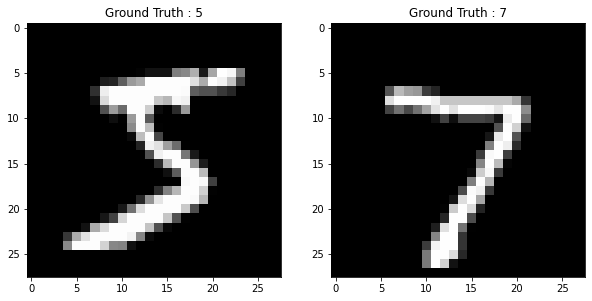

In [ ]:
#using the matplotib imported above to make plots of the data
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## Flatten the data

In this notebook we won't be making use of the data as "images" but rather as long vectors of length 784

## This is what an example in the dataset looks like

In [ ]:
X_train[0].shape #shape of X_train

(28, 28)

In [ ]:
X_train[0] #viewing the dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Convert from image shape to a vector shape

We go from 28x28 pixel sized images to a vector of length 784.

We would like to reshape the training data from shape (60000, 28, 28) to (60000,784). To do this, we can make use of Numpy's *reshape* function. 



In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2] #converting pixel sized images to vector length

In [ ]:
X_train = np.reshape(X_train, (60000,784)) #reshaping X train 
X_test = np.reshape(X_test, (10000,784)) #reshaping X_text

## Now the data is a long vector

There are 60,000 examples for which each is a vector of length 784

In [ ]:
X_train.shape #viewing the shape of X_train

(60000, 784)

## View the first example

In [ ]:
X_train[0].shape 

(784,)

In [ ]:
X_train[0] #viewing the X_train data

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
X_test[0].shape

(784,)

## Task: Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be easier. To do this, we simply divide by the maximum value, in this case 255.

In [ ]:
#Normalizing X_trin and X_test
X_train = (X_train) / (255)
X_test = (X_test)/(255)

## One hot encoding

We're going to want our labels as one-hot vectors, which are vectors that holds mostly 0's and one 1. It's easiest to see this in a example. As a one-hot vector, the number 0 is represented as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], and 4 is represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].

One-hot encoded vectors allow us to map each category in our set of labels to a vector where only a single value is 1.

0 maps to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

1 maps to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

2 maps to [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

Notes on one-hot encoding: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

## Before

In [ ]:
Y_test[0] #Y_test before one-hot encoding

7

## Task: Convert from categorical labels to one-hot encoded vectors

In this case there are 10 classes so we can tell the function to convert into a vector of length 10. You need to convert both the training targets and the testing targets.

In [ ]:
#Perfoming one-hot encoding on Y_train and Y_test
Y_train = np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

## After

In [ ]:
Y_test[0] #Y_test after one-hot encoding

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Task: Create a neural network model

In [ ]:
#model definition 
def baseline():
 
    model = Sequential() #creating a model
    # adding fully connected layers
    model.add(Dense(16, input_dim=784, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Compiling model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

## Task: Initialise the model

In [ ]:
model = baseline() #initializing the model

## Task: Determine the number of trainable parameters

In [ ]:
model.summary() #model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# checking the shapes of different data

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
Y_test.shape

(10000, 10)

## Task: Begin training

Fit on the training features and targets. Also make use of the validation data you've set aside above. Set the number of epochs, batch size and also explore various *verbose* values.

In [ ]:
#splitting training data further to have validaton data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3) 

In [ ]:
#training the model over 15 epochs

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val) ,epochs = 15, batch_size=4, verbose=1)



Epoch 1/15
10500/10500 [==============================] - 80s 6ms/step - loss: 0.3844 - accuracy: 0.8860 - val_loss: 0.2617 - val_accuracy: 0.9251
Epoch 2/15
10500/10500 [==============================] - 63s 6ms/step - loss: 0.2320 - accuracy: 0.9330 - val_loss: 0.2214 - val_accuracy: 0.9359
Epoch 3/15
10500/10500 [==============================] - 63s 6ms/step - loss: 0.1992 - accuracy: 0.9412 - val_loss: 0.2071 - val_accuracy: 0.9411
Epoch 4/15
10500/10500 [==============================] - 63s 6ms/step - loss: 0.1794 - accuracy: 0.9460 - val_loss: 0.2262 - val_accuracy: 0.9368
Epoch 5/15
10500/10500 [==============================] - 61s 6ms/step - loss: 0.1645 - accuracy: 0.9506 - val_loss: 0.2146 - val_accuracy: 0.9409
Epoch 6/15
10500/10500 [==============================] - 62s 6ms/step - loss: 0.1550 - accuracy: 0.9528 - val_loss: 0.1932 - val_accuracy: 0.9454
Epoch 7/15
10500/10500 [==============================] - 61s 6ms/step - loss: 0.1473 - accuracy: 0.9564 - val_loss: 0

## Task: Predict on the test data

In [ ]:
prediction = model.predict(X_test) #predicting the test data

In [ ]:
prediction_classes = np.argmax(prediction, axis=1)

## Task: Compute the accuracy

In [ ]:
accuracy_score(np.argmax(Y_test,1), prediction_classes) #accuracy score of the model

0.9475